###               Titanic Logistic Regression Project

### INTRODUCTION
We are using the Titanic dataset to predict passenger survival using logistic regression. Features used include Pclass, Age, Fare, and SibSp.

This notebook uses logistic regression to predict passenger survival on the Titanic dataset and performance is evaluated using accuracy, classification report, and confusion matrix.



### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Loading the dataset

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Viewing the first 5 rows

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Analyzing the column names

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### checking any null values available or not

In [5]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop the rows with null values

In [7]:
df.dropna(inplace=True)

### Checking again for null values

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Splitting the dataset into X and y for training

In [11]:
X=df[['Pclass','Age', 'SibSp', 'Fare']]

In [12]:
y=df['Survived']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Training the model

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

### Predicting

In [21]:
pred=lr.predict(X_test)
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Model accuracy, classification_report, confusion matrix

In [22]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.7027027027027027

In [24]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.75      0.89      0.81        27

    accuracy                           0.70        37
   macro avg       0.57      0.54      0.54        37
weighted avg       0.66      0.70      0.67        37



<Axes: >

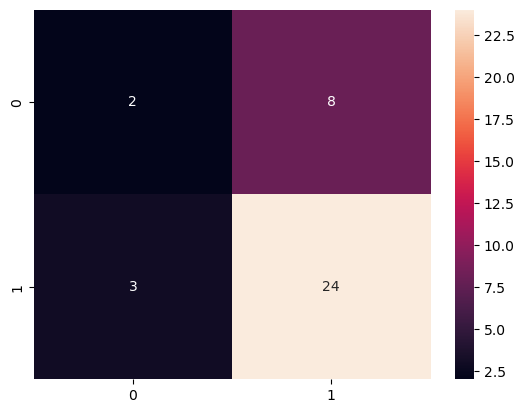

In [26]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

### FINAL THOUGHTS :

### MODELS ACCURACY WAS AROUND 70% WHICH MAY BE IMPROVED USING SCALING AND ADDING MOORE FEATURES